<div style="overflow:auto;">
    <div style="float:left; margin-right:10px;">
        <img width='120' height='120' src='https://cityme.novaims.unl.pt/images/footer/novaims.png'>
    </div>

# <p align="center">Fidelidade chatbot</p>

---

## <p align="center">*1 - Evaluation*</p>

---

In this notebook, we aim to evaluate the performance of a chatbot by comparing its responses to a set of reference question-answer (Q&A) pairs extracted from a PDF. The goal is to systematically assess how accurately and semantically appropriately the chatbot answers real-world questions, helping to identify areas for improvement and optimization.

Our evaluation approach involves three key steps:

1. **Q&A Extraction**:  
   We parse a PDF document to extract structured Q&A pairs.

2. **Chatbot Response Generation**:  
   For each extracted question, we query the chatbot and record its generated answer along with the response time.

3. **Evaluation Metrics**:
   - **String Similarity**: We use fuzzy string matching (Levenshtein distance) to quantify the lexical similarity between the chatbot's answer and the expected answer.
   - **Semantic Similarity**: We compute the cosine similarity between sentence embeddings (using a transformer model) to assess contextual alignment, enabling evaluation beyond surface-level word overlap.

The output includes per-question evaluation results, summary statistics such as overall accuracy and average response time, and automatically saved reports for both string-based and semantic evaluations.

This evaluation framework provides both quantitative insights and qualitative feedback on chatbot behavior, helping guide further training and refinement efforts.


### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *May 26, 2025*  
📍 **Prepared for:** *FidelidadeC*

---

# Table of Contents

1. [Import Libraries & Data](#1-import-libraries--data)  
2. [Evaluation](#2-evaluation)  
   2.1. [String Similarity](#21-string-similarity)  
   2.2. [Semantic Similarity](#22-semantic-similarity)
   2.3. [Bot-based Similarity](#23-bot-based-similarity)
   

# 1. Import Libraries & Data

In [1]:
# Imports
from api import *
from sentence_transformers import SentenceTransformer
from eval_utils import *

import warnings
warnings.filterwarnings("ignore", message="CropBox missing from /Page") 
warnings.filterwarnings("ignore", message=".*ScriptRunContext.*")
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

8J6pTdfaGgA5r193UVLsBshUspqwNpal42Jse1aHaok1cWNTLpRkJQQJ99BDACYeBjFXJ
https://ai-bcds.openai.azure.com/


c:\Users\abdar\anaconda3\envs\Case4BCwDS\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-26 21:48:13.156 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 21:48:14.872 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 21:48:14.872 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 21:48:14.872 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

# 2. Evaluation

In this section, we extract question-and-answer (Q&A) pairs from a structured PDF document. These pairs will serve as the reference dataset for evaluating the performance of our chatbot.

The extraction process is designed to:
- Detect and separate questions (typically marked with a bullet point or other prefix),
- Identify corresponding answers (often marked with a specific prefix like "R:"),
- Clean and structure the text into a format suitable for further evaluation.

This automated extraction ensures consistency, reduces manual effort, and prepares our data for downstream comparison using both string similarity and semantic evaluation techniques.

In [2]:
qa_pairs = extract_qa_pairs_from_pdf('./docs/Documents for training and evaluation-20250507/Questions_Answers_Censored.pdf')

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


To understand how well our chatbot answers questions extracted from the PDF, we will evaluate its responses using several key metrics:

| **Metric**            | **What It Measures**                                                                 |
|-----------------------|--------------------------------------------------------------------------------------|
| **Accuracy**          | Percentage of chatbot answers that closely match the expected answer.               |
| **Similarity Score**  | Fuzzy match score (0–100) comparing chatbot’s answer to the expected answer.        |
| **Match (Yes/No)**    | Whether the answer is considered correct (based on a similarity threshold, e.g. 70).|
| **Response Time**     | Time (in seconds) taken by the chatbot to respond to a question.                    |
| **Average Response**  | Average of all response times — reflects chatbot’s overall speed/efficiency.       |

These metrics help quantify both the correctness and responsiveness of the chatbot, guiding improvements and benchmarking.

# 2.1 String Similarity

In this section, we assess how closely the chatbot's answers match the expected answers by measuring their textual similarity. We use fuzzy string matching techniques, which account for minor differences such as typos, paraphrasing, or formatting variations.

The main tool used is the **FuzzyWuzzy** library, which calculates a similarity score between 0 and 100 based on the Levenshtein distance. Higher scores indicate greater similarity.

By setting a similarity threshold, we classify chatbot answers as correct or incorrect. This method provides a straightforward, interpretable way to evaluate answer quality based purely on text overlap.

In [3]:
# run_multiple_evaluations(
#     qa_pairs=qa_pairs,
#     num_runs=15,
#     threshold=70,
#     evaluation_func=evaluate_string_and_save,
#     summary_filename="string_summary_results",
#     detailed_filename="string_detailed_results"
# )

#### Why String Similarity Evaluation Can Be Problematic

Evaluating chatbot or assistant answers using **string similarity** methods can be unreliable for several reasons:

- **Surface-Level Matching:** String similarity compares the literal characters or tokens in the text. It does not understand the *meaning* behind the answer. Two answers can be semantically equivalent but phrased very differently, leading to low similarity scores.

- **Sensitive to Minor Differences:** Even small changes like punctuation, synonyms, or word order can drastically reduce the similarity score, unfairly marking correct answers as wrong.

- **Ignores Context and Paraphrasing:** Good language models often rephrase answers or use synonyms, which string similarity methods might penalize despite the answer being correct.

Because of these limitations, string similarity can lead to misleading evaluation results, especially in natural language tasks. Nonetheless, we include this section to show that we explored and considered this approach during our evaluation process.

---

#### Next Step: Evaluating with Semantic Similarity

To better capture the *meaning* behind responses, we will move to **semantic similarity** evaluation. This approach uses embeddings from models like Sentence Transformers to compare the *contextual meaning* of two sentences, rather than just their surface forms.

Semantic similarity can:

- Recognize paraphrases and synonyms
- Be more robust to minor wording differences
- Provide a more accurate measure of whether the chatbot's answer truly matches the expected answer

Next, we will implement and test semantic similarity evaluation using pre-trained sentence embedding models.


## 2.2 Semantic Similarity

In this section, we assess chatbot answers by measuring the **similarity of their underlying meaning** rather than exact wording. Using **sentence embeddings** and **cosine similarity**, this approach provides a deeper understanding of response quality—especially useful when answers are **rephrased** or use **different vocabulary**.

We use models such as:
- [`paraphrase-multilingual-MiniLM-L12-v2`](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2): lightweight, fast, and multilingual, good for general-purpose evaluations.
- [`LaBSE`](https://huggingface.co/sentence-transformers/LaBSE): a more powerful model designed for **language-agnostic sentence embeddings**, better suited for multilingual and semantically rich content.

> ⚠️ **Note:** Because semantic similarity is **less sensitive to wording variation** and tends to produce **stable results** (especially with low-generation-temperature settings), we typically perform **fewer evaluation runs**—often a **single run** is sufficient.

This type of evaluation offers a more **flexible and robust** way to judge chatbot performance, especially in real-world use cases where exact phrasing is less important than meaning.

### MiniLM

In [4]:
# Load the model
model_name_str = 'paraphrase-multilingual-MiniLM-L12-v2'
model = SentenceTransformer(model_name_str)

# Get answers from chatbot
chatbot_answers = answer_faq(qa_pairs, model, show_print=False)

# Evaluate on different thresholds
summary, results = evaluate_precomputed(chatbot_answers, model_name_str, thresholds=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75])

Answering the FAQ: 100%|██████████| 18/18 [01:08<00:00,  3.82s/it]


===== Summary at threshold 0.5 =====
Total: 18, Correct: 10, Accuracy: 55.56%, Avg Response Time: 3.71s

===== Summary at threshold 0.55 =====
Total: 18, Correct: 8, Accuracy: 44.44%, Avg Response Time: 3.71s

===== Summary at threshold 0.6 =====
Total: 18, Correct: 6, Accuracy: 33.33%, Avg Response Time: 3.71s

===== Summary at threshold 0.65 =====
Total: 18, Correct: 5, Accuracy: 27.78%, Avg Response Time: 3.71s

===== Summary at threshold 0.7 =====
Total: 18, Correct: 3, Accuracy: 16.67%, Avg Response Time: 3.71s

===== Summary at threshold 0.75 =====
Total: 18, Correct: 3, Accuracy: 16.67%, Avg Response Time: 3.71s


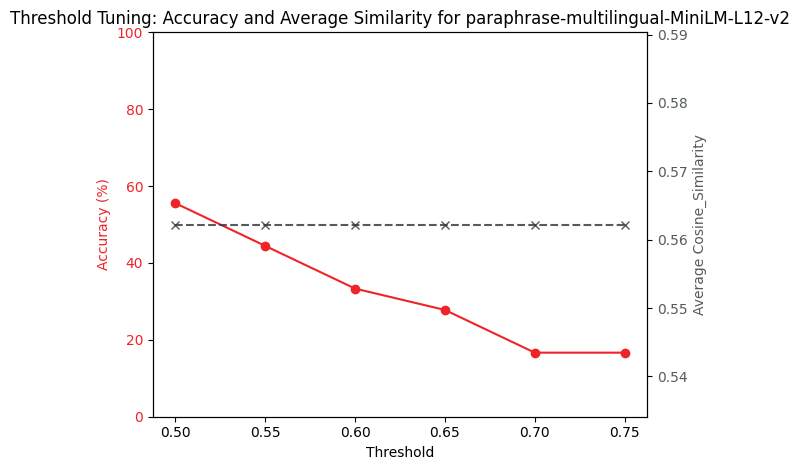

In [5]:
plot_evaluation_metrics(results, model_name_str)

### LaBSE

In [6]:
# Load the model
model_name_str = 'sentence-transformers/LaBSE'
model = SentenceTransformer(model_name_str)

# Get answers from chatbot
chatbot_answers = answer_faq(qa_pairs, model, show_print=False)

# Evaluate on different thresholds
summary, results = evaluate_precomputed(chatbot_answers, model_name_str, thresholds=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75])

Answering the FAQ: 100%|██████████| 18/18 [01:10<00:00,  3.90s/it]


===== Summary at threshold 0.5 =====
Total: 18, Correct: 11, Accuracy: 61.11%, Avg Response Time: 3.52s

===== Summary at threshold 0.55 =====
Total: 18, Correct: 9, Accuracy: 50.00%, Avg Response Time: 3.52s

===== Summary at threshold 0.6 =====
Total: 18, Correct: 6, Accuracy: 33.33%, Avg Response Time: 3.52s

===== Summary at threshold 0.65 =====
Total: 18, Correct: 4, Accuracy: 22.22%, Avg Response Time: 3.52s

===== Summary at threshold 0.7 =====
Total: 18, Correct: 2, Accuracy: 11.11%, Avg Response Time: 3.52s

===== Summary at threshold 0.75 =====
Total: 18, Correct: 1, Accuracy: 5.56%, Avg Response Time: 3.52s


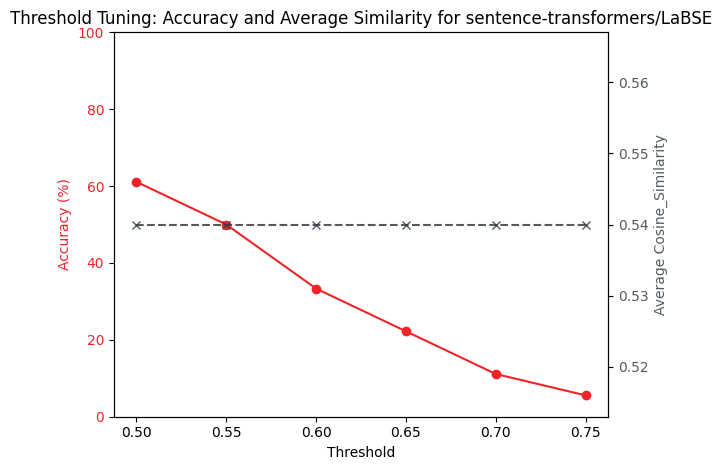

In [7]:
plot_evaluation_metrics(results, model_name_str)

#### Comparison of Sentence Embedding Models for Portuguese Q&A Evaluation

When evaluating question-answer pairs in Portuguese from Portugal (pt-PT), choosing the right sentence embedding model is crucial for balancing accuracy, speed, and language coverage. 

Below is a comparison between two popular models suitable for this task:

| Feature / Model                                | paraphrase-multilingual-MiniLM-L12-v2         | LaBSE                                         |
|------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Publisher**                                  | Sentence-Transformers                         | Google Research                                |
| **Languages Supported**                        | ~50+ (including pt-PT)                        | 100+ (strong pt-PT support)                   |
| **Portuguese Variant**                         | Multilingual, supports both pt-PT and pt-BR   | Multilingual, very strong pt-PT support        |
| **Model Size**                                 | ~135M parameters                              | ~470M parameters                              |
| **Inference Speed**                            | ✅ Fast                                        | ❌ Slower                                     |
| **Accuracy (Semantic Similarity)**             | Moderate to High                              | High                                          |
| **Fine-tuned For**                             | Paraphrase mining, sentence embeddings        | Language-agnostic sentence embeddings         |
| **Training Dataset**                           | Multilingual paraphrase pairs                 | Translation and alignment-based corpora       |
| **Sentence Embedding Quality**                 | Good, efficient                               | Very high, better alignment across languages  |
| **Best Use Case**                              | Real-time evaluation, large-scale tests       | High-accuracy offline QA evaluation           |
| **Model Hub**                                  | [`sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2`](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) | [`sentence-transformers/LaBSE`](https://huggingface.co/sentence-transformers/LaBSE) |


In [8]:
summary_csv = "evaluation/semantic_summary_results.csv"
detailed_csv = "evaluation/semantic_detailed_results.csv"

## 2.3 Bot-based Similarity

In this section, we evaluate the quality of answers generated by an assistant by comparing them to the expected answers using another LLM-based assistant as a judge. The judging assistant is prompted to assess the similarity between the expected and actual responses and return a numeric score from 0 to 10, with 10 indicating a perfect match.

This bot-based evaluation method leverages the language model's ability to interpret semantic meaning, making it useful for assessing open-ended or context-rich answers where traditional string matching techniques may fall short. By automating this process, we can efficiently and consistently evaluate large sets of question-answer pairs.

As the assistant’s evaluations are generative in nature, slight variability in scores is expected between runs, even when the inputs remain the same. This is a natural consequence of the probabilistic nature of language models.

In [9]:
results = bot_evaluation(qa_pairs, query_assistant, eval_chat)

Evaluating using the Bot: 100%|██████████| 18/18 [01:57<00:00,  6.53s/it]


In [10]:
for i in range(len(results)):
    print(f'Q{i+1} Similarity Score:', results[i]["Similarity_Score"])


Q1 Similarity Score: 6
Q2 Similarity Score: 8
Q3 Similarity Score: 2
Q4 Similarity Score: 8
Q5 Similarity Score: 8
Q6 Similarity Score: 7
Q7 Similarity Score: 7
Q8 Similarity Score: 8
Q9 Similarity Score: 8
Q10 Similarity Score: 6
Q11 Similarity Score: 8
Q12 Similarity Score: 2
Q13 Similarity Score: 8
Q14 Similarity Score: 4
Q15 Similarity Score: 3
Q16 Similarity Score: 8
Q17 Similarity Score: 6
Q18 Similarity Score: 8


In [11]:
model_name_str="Bot"

summary, evaluations = evaluate_precomputed(results, model_name_str, similarity_col='Similarity_Score', thresholds=[4, 5, 6, 7, 8])


===== Summary at threshold 4 =====
Total: 18, Correct: 15, Accuracy: 83.33%, Avg Response Time: 3.68s

===== Summary at threshold 5 =====
Total: 18, Correct: 14, Accuracy: 77.78%, Avg Response Time: 3.68s

===== Summary at threshold 6 =====
Total: 18, Correct: 14, Accuracy: 77.78%, Avg Response Time: 3.68s

===== Summary at threshold 7 =====
Total: 18, Correct: 11, Accuracy: 61.11%, Avg Response Time: 3.68s

===== Summary at threshold 8 =====
Total: 18, Correct: 9, Accuracy: 50.00%, Avg Response Time: 3.68s


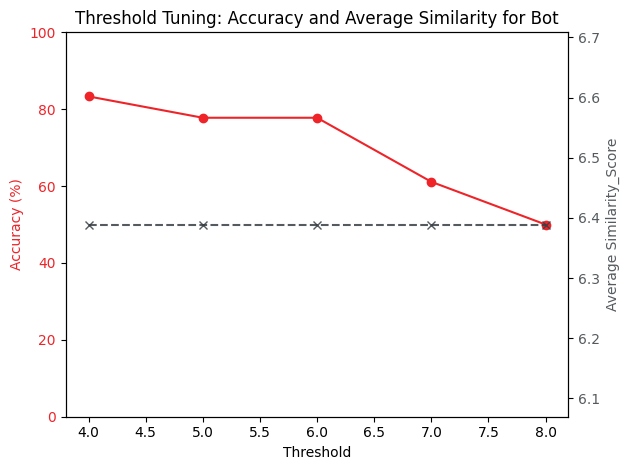

In [12]:
plot_evaluation_metrics(evaluations, similarity_col='Similarity_Score', model_name_str=model_name_str)